In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# 1. Carregamento de Dados


In [2]:
df = pd.read_csv('data/index_1.csv')
df.head(24)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


# 2. Exploração Inicial dos Dados


In [3]:
df.columns.tolist()

['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']

In [4]:
df.value_counts('cash_type')

cash_type
card    3547
cash      89
Name: count, dtype: int64

# 3. Limpeza de Dados


In [5]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
df_card = df[df["cash_type"] == "card"].copy()

In [7]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

# 4. Transformação de Features Temporais


In [8]:
df['card'] = df['card'].dropna()

# 5. Análise de Vendas por Horário

## 5.1. Visualização de Vendas por Horário


In [9]:
df.head(24)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [10]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["time_30min"] = df["datetime"].dt.round("30min")
df["time_of_day"] = df["time_30min"].dt.time
df["hour_float_30min"] = df["time_30min"].dt.hour + df["time_30min"].dt.minute / 60
df["day_of_week"] = df["datetime"].dt.dayofweek

hour = df["datetime"].dt.hour
day = df["datetime"].dt.day

conditions = [
    (hour.between(6, 8)) | ((hour.between(19, 23)) & (day % 3 == 0)),
    (hour.between(9, 11)) | (hour.between(12, 14)),
    (hour.between(15, 17)) & (day % 2 == 0),
    hour.between(18, 23)
]

choices = ["frio", "sol", "chuva", "nublado"]

df["weather"] = np.select(conditions, choices, default="sol")

## 5.2. Identificação de Horários de Pico


In [11]:
grouped = (
    df.groupby(["time_of_day", "coffee_name"])  
      .size()
      .reset_index(name="count")
)
grouped = grouped.sort_values("time_of_day")
grouped["time_dt"] = pd.to_datetime(grouped["time_of_day"].astype(str))

/tmp/ipykernel_34900/3950481295.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped["time_dt"] = pd.to_datetime(grouped["time_of_day"].astype(str))


## 5.3. Visualização de Cafés nos Horários de Pico


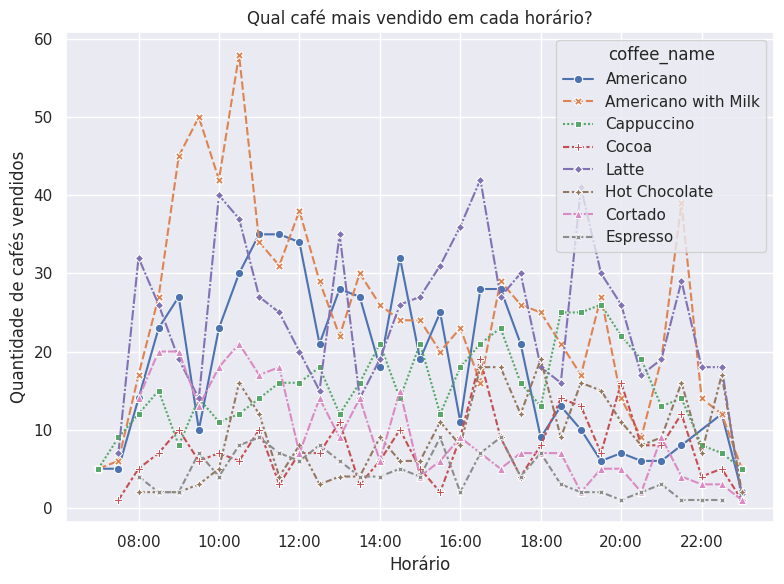

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.lineplot(
    data=grouped,
    x="time_dt",
    y="count",
    markers=True,
    marker="o",
    hue="coffee_name",
    style="coffee_name"
)

plt.xlabel("Horário")
plt.ylabel("Quantidade de cafés vendidos")
plt.title("Qual café mais vendido em cada horário?")

time_fmt = DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(time_fmt)

plt.tight_layout()
plt.show()

# 6. Salvamento dos Dados Limpos


In [13]:
total_per_time = (
    grouped.groupby("time_dt")["count"]
    .sum()
    .reset_index()
    .sort_values("time_dt")
)

peak_times = (
    total_per_time
    .nlargest(2, "count")["time_dt"]
    .dt.time
    .tolist()
)

grouped_peak = grouped[grouped["time_of_day"].isin(peak_times)]

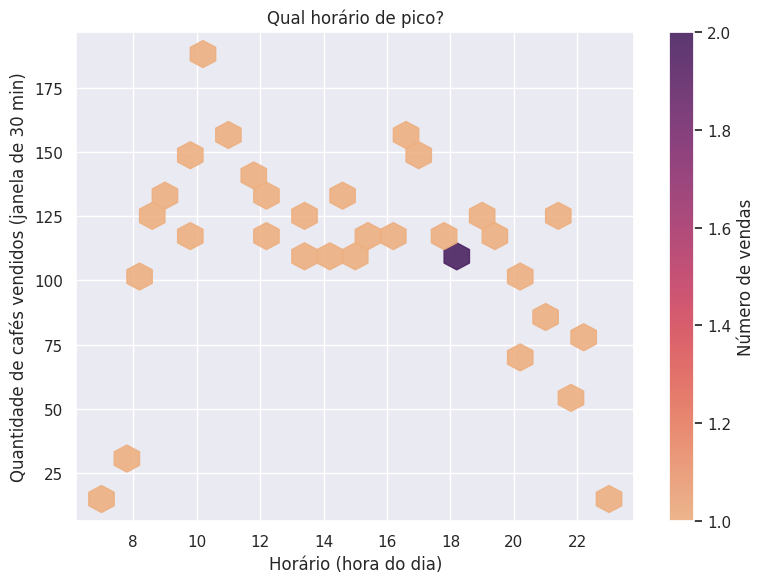

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

if "hour_float" not in total_per_time.columns:
    total_per_time = total_per_time.sort_values("time_dt").copy()
    total_per_time["hour_float"] = (
        total_per_time["time_dt"].dt.hour
        + total_per_time["time_dt"].dt.minute / 60
    )

hb = plt.hexbin(
    total_per_time["hour_float"],
    total_per_time["count"],
    gridsize=20,
    cmap="flare",
    mincnt=1,
    alpha=0.9
)
plt.colorbar(hb, label="Número de vendas")

plt.xlabel("Horário (hora do dia)")
plt.ylabel("Quantidade de cafés vendidos (janela de 30 min)")
plt.title("Qual horário de pico?")

plt.tight_layout()
plt.show()

/tmp/ipykernel_34900/488872454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_34900/488872454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


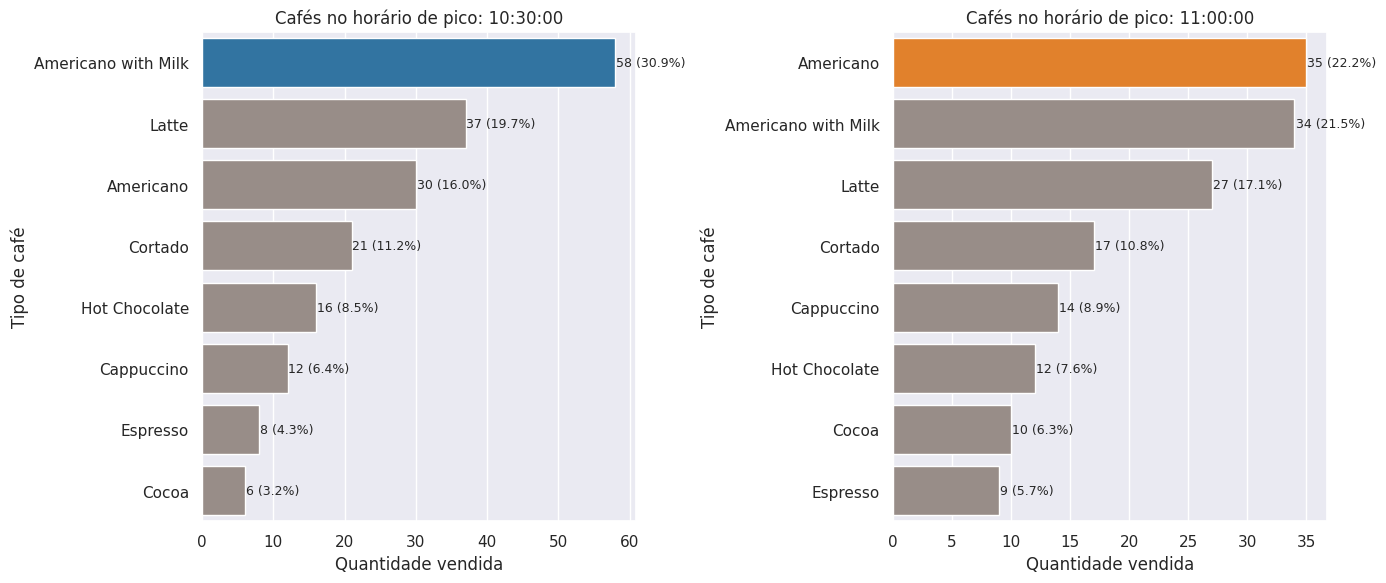

In [15]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)
colors = ["#1f77b4", "#ff7f0e"]  

for ax, t, color in zip(axes, peak_times, colors):
    data_peak = grouped_peak[grouped_peak["time_of_day"] == t].copy()
    data_peak = data_peak.sort_values("count", ascending=False)
    total = data_peak["count"].sum()
    data_peak["perc"] = data_peak["count"] / total * 100

    palette = [color] + ["#9b8c85"] * (len(data_peak) - 1)

    sns.barplot(
        data=data_peak,
        x="count",
        y="coffee_name",
        ax=ax,
        palette=palette
    )

    for i, (c, p) in enumerate(zip(data_peak["count"], data_peak["perc"])):
        ax.text(
            c + 0.1,
            i,
            f"{c} ({p:.1f}%)",
            va="center",
            fontsize=9
        )

    ax.set_title(f"Cafés no horário de pico: {t}")
    ax.set_xlabel("Quantidade vendida")
    ax.set_ylabel("Tipo de café")

plt.tight_layout()
plt.show()

In [16]:
df.to_csv('data/coffee_cleaned.csv', index=False)
print(f"dataset limpo: {df.shape}")

dataset limpo: (3636, 11)
